In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv("/home/z/Python/CiscoAML/CTU-13/CTU-13-072020.csv", header=0)

In [3]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,147.32.84.165-94.63.149.152-1039-80-6,147.32.84.165,1039,94.63.149.152,80,6,15/08/2011 07:53:44 AM,184605,30,13,...,20,0,0,0,0,1.313420e+15,43206.163143,1.313420e+15,1.313420e+15,1
1,147.32.84.165-94.63.149.152-1039-80-6,147.32.84.165,1039,94.63.149.152,80,6,15/08/2011 07:53:44 AM,462,3,0,...,20,0,0,0,0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1
2,147.32.84.165-94.63.149.152-1040-80-6,147.32.84.165,1040,94.63.149.152,80,6,15/08/2011 07:53:48 AM,289018,116,50,...,20,0,0,0,0,1.313420e+15,63261.340577,1.313420e+15,1.313420e+15,1
3,147.32.84.165-94.63.149.152-1040-80-6,147.32.84.165,1040,94.63.149.152,80,6,15/08/2011 07:53:49 AM,1251,13,0,...,20,0,0,0,0,1.313420e+15,218.539399,1.313420e+15,1.313420e+15,1
4,147.32.84.165-94.63.150.52-1041-80-6,147.32.84.165,1041,94.63.150.52,80,6,15/08/2011 07:53:56 AM,271680,6,4,...,20,0,0,0,0,1.313420e+15,77448.421134,1.313420e+15,1.313420e+15,1


In [4]:
df.isnull().sum().sum()

47

In [5]:
df.dropna(inplace=True)

## Data Visualizations

In [6]:
# Plot the amount of traffic from Source IP addresses
sip_df = df['Src IP'].copy()
values = sip_df.value_counts(sort=True)

values_sip_df = pd.DataFrame(values)
values_sip_df = values_sip_df.reset_index()

values_sip_df .columns = ['Src IP','count']
values_sip_df 

,Src IP,count
0,147.32.84.165,162708
1,147.32.84.192,15514
2,147.32.84.191,15024
3,147.32.84.209,14657
4,147.32.84.204,14025
...,...,...
7049,112.95.66.142,1
7050,58.229.48.241,1
7051,218.21.154.103,1
7052,121.171.70.253,1


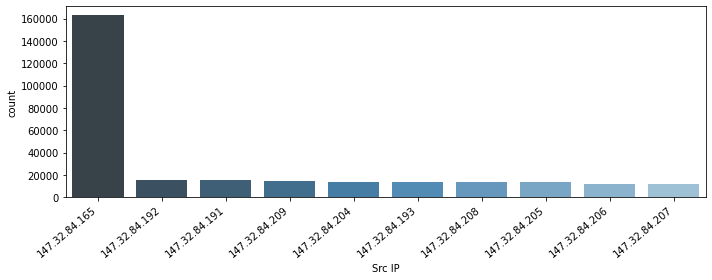

In [7]:
# Plot the amount of traffic from Source IP addresses
plt.figure(figsize=(10,4))
plot = sns.barplot(x="Src IP", y="count", data=values_sip_df.head(10), palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [8]:
# Plot the amount of traffic from Destination IP addresses
dip_df = df['Dst IP'].copy()
values = dip_df.value_counts(sort=True)

values_dip_df = pd.DataFrame(values)
values_dip_df = values_dip_df.reset_index()

values_dip_df.columns = ['Dst IP','count']
values_dip_df

,Dst IP,count
0,147.32.80.9,29528
1,184.173.217.40,21405
2,147.32.84.165,13054
3,46.4.36.120,7085
4,173.192.170.88,4929
...,...,...
50514,208.109.77.24,1
50515,218.67.50.51,1
50516,125.65.134.63,1
50517,96.2.27.39,1


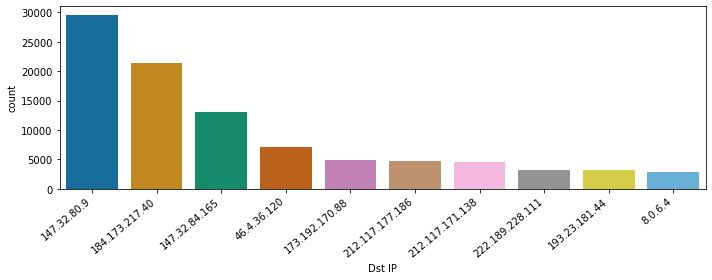

In [9]:
# Plot the amount of traffic from Source IP addresses
plt.figure(figsize=(10,4))
plot = sns.barplot(x="Dst IP", y="count", data=values_dip_df.head(10), palette="colorblind")
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

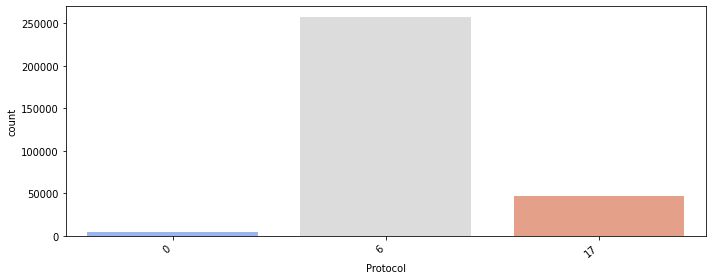

In [10]:
# Plot the amount of traffic over Protocols
# Protocol numbers map to IANA numbers see: https://www.iana.org/assignments/protocol-numbers/protocol-numbers.xhtml
# 6 is TCP, 17 is UDP
plt.figure(figsize=(10,4))
plot = sns.countplot(x="Protocol",data=df, palette="coolwarm")
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [11]:
# Most of the traffic is across port 80
sp_df = df['Src Port'].copy()
values = sp_df.value_counts(sort=True)
values_df = pd.DataFrame(values)
values_df = values_df.reset_index()
values_df.columns = ['port','count']
values_df

,port,count
0,0,4458
1,80,4108
2,2077,3693
3,2079,3094
4,3389,2909
...,...,...
27551,5776,1
27552,7825,1
27553,15095,1
27554,10997,1


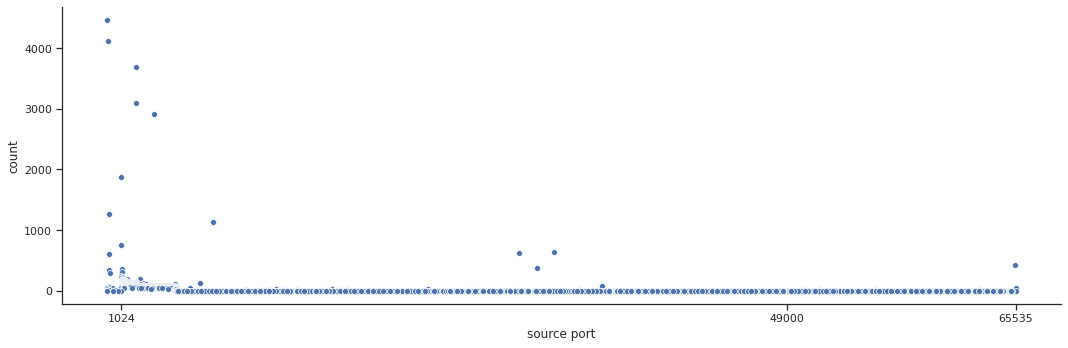

In [12]:
# A scatter plot across port counts
i = sns.set(style='ticks')
i = sns.relplot(x="port", y="count", data=values_df, aspect=3)
i.set_axis_labels('source port').set(xticks=[1024, 49000, 65535])
plt.show(i)

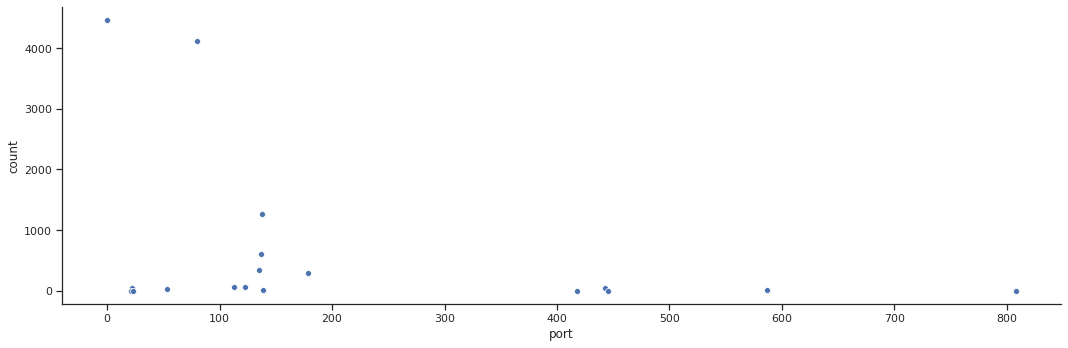

In [13]:
# A scatter plot of port counts for ports < 1024
less_than_1024 = values_df[values_df.port < 1023]
less_than_1024
j = sns.set(style='ticks')
j = sns.relplot(x="port", y="count", data=less_than_1024, aspect=3)
plt.show(j)

## Network Topology Diagram

In [14]:
import networkx as nx
%matplotlib inline
G = nx.Graph()

In [20]:
G = nx.from_pandas_edgelist(df=df.head(100), source='Src IP', target='Dst IP')

In [23]:
plt.rcParams['figure.figsize'] = 15,12

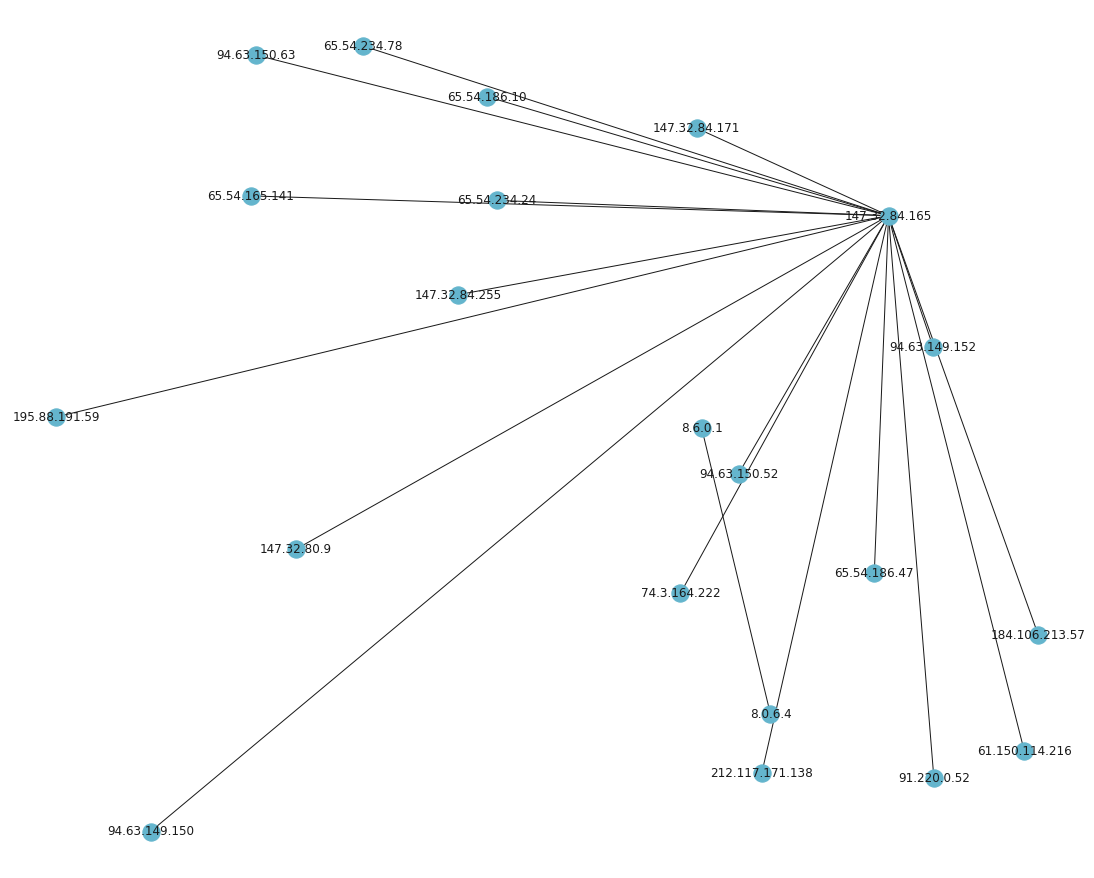

In [24]:
pos = nx.spring_layout(G, scale=1.0, iterations=1)
nx.draw(G, pos, node_color='c',edge_color='k', with_labels=True)